<h1><font color="blue">정렬&순위 그리고 누락 값</font></h1>

<h2><font color="red">데이터 정렬하기</font></h2>

<h4><font color="green">데이터 프레임 읽기</font></h4>

In [59]:
import pandas as pd

In [76]:
homeware = pd.read_csv('./../data/가전제품.csv', encoding='cp949')
rowindex = homeware['제품명'] + '_' + homeware['분기'].astype('str') + '사분기'
homeware.index = rowindex
homeware.head()

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
미니오븐_1사분기,미니오븐,1,85,20,6000,24,50
전기밥솥_1사분기,전기밥솥,1,85,25,9000,36,80
믹서기_1사분기,믹서기,1,90,25,12000,48,80
전자레인지_1사분기,전자레인지,1,85,25,7200,29,50
미니냉장고_1사분기,미니냉장고,1,65,25,4800,19,65


<h6><font color="BlueViolet">'일생산량' 열을 Series로 추출</font></h6>

In [61]:
dayproduct = homeware['일생산량']
dayproduct.to_frame().head(5)

,일생산량
미니오븐_1사분기,85
전기밥솥_1사분기,85
믹서기_1사분기,90
전자레인지_1사분기,85
미니냉장고_1사분기,65


<h6><font color="BlueViolet">색인을 기반으로 정렬</font></h6>

In [62]:
result = dayproduct.sort_index()
result.to_frame().head()

,일생산량
미니냉장고_1사분기,65
미니냉장고_2사분기,90
미니냉장고_3사분기,90
미니냉장고_4사분기,85
미니오븐_1사분기,85


In [63]:
result = dayproduct.sort_index(ascending=False)
result.to_frame().head()

,일생산량
전자레인지_4사분기,95
전자레인지_3사분기,70
전자레인지_2사분기,90
전자레인지_1사분기,85
전기밥솥_4사분기,100


<h6><font color="BlueViolet">값을 기반으로 정렬</font></h6>

In [64]:
result = dayproduct.sort_values()
result.to_frame().head()

,일생산량
선풍기_2사분기,65
미니냉장고_1사분기,65
전자레인지_3사분기,70
전기밥솥_2사분기,70
선풍기_1사분기,70


In [65]:
result = dayproduct.sort_values(ascending=False)
result.to_frame().head()

,일생산량
전기밥솥_4사분기,100
미니오븐_3사분기,95
전자레인지_4사분기,95
믹서기_1사분기,90
선풍기_3사분기,90


<h4><font color="green">axis 옵션을 이용한 DataFrame 정렬하기</font></h4>

In [66]:
result = homeware.sort_index(axis=0)
result.head()

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
미니냉장고_1사분기,미니냉장고,1,65,25,4800,19,65
미니냉장고_2사분기,미니냉장고,2,90,25,5120,22,60
미니냉장고_3사분기,미니냉장고,3,90,25,12400,17,75
미니냉장고_4사분기,미니냉장고,4,85,20,4960,17,50
미니오븐_1사분기,미니오븐,1,85,20,6000,24,50


In [67]:
result = homeware.sort_index(axis=1)
result.head()

,분기,불량품,생산일수,일생산량,제품명,총생산량,출고량
미니오븐_1사분기,1,24,20,85,미니오븐,6000,50
전기밥솥_1사분기,1,36,25,85,전기밥솥,9000,80
믹서기_1사분기,1,48,25,90,믹서기,12000,80
전자레인지_1사분기,1,29,25,85,전자레인지,7200,50
미니냉장고_1사분기,1,19,25,65,미니냉장고,4800,65


In [68]:
result = homeware.sort_index(axis=1, ascending = False)
result.head()

,출고량,총생산량,제품명,일생산량,생산일수,불량품,분기
미니오븐_1사분기,50,6000,미니오븐,85,20,24,1
전기밥솥_1사분기,80,9000,전기밥솥,85,25,36,1
믹서기_1사분기,80,12000,믹서기,90,25,48,1
전자레인지_1사분기,50,7200,전자레인지,85,25,29,1
미니냉장고_1사분기,65,4800,미니냉장고,65,25,19,1


In [69]:
result = homeware.sort_values(by=['총생산량'])
result.head()

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
미니냉장고_1사분기,미니냉장고,1,65,25,4800,19,65
미니냉장고_4사분기,미니냉장고,4,85,20,4960,17,50
미니오븐_2사분기,미니오븐,2,85,20,4960,26,55
미니냉장고_2사분기,미니냉장고,2,90,25,5120,22,60
미니오븐_1사분기,미니오븐,1,85,20,6000,24,50


In [70]:
result = homeware.sort_values(by=['불량품'], ascending=False)
result.head()

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
전기밥솥_3사분기,전기밥솥,3,90,25,9300,52,90
믹서기_1사분기,믹서기,1,90,25,12000,48,80
미니오븐_4사분기,미니오븐,4,80,25,6200,47,80
믹서기_4사분기,믹서기,4,80,25,6400,43,95
선풍기_1사분기,선풍기,1,70,25,10800,43,55


In [74]:
result = homeware.sort_values(by=['생산일수', '일생산량'], ascending=[True, False])
result.head()

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
미니오븐_3사분기,미니오븐,3,95,20,6200,31,65
전자레인지_4사분기,전자레인지,4,95,20,9600,26,95
전자레인지_2사분기,전자레인지,2,90,20,7680,22,60
미니오븐_1사분기,미니오븐,1,85,20,6000,24,50
미니오븐_2사분기,미니오븐,2,85,20,4960,26,55


<h2><font color="red">순위 매기기</font></h2>

In [133]:
total = homeware['총생산량']
total = total.to_frame().sort_values(by='총생산량')
total.head()

,총생산량
미니냉장고_1사분기,4800
미니냉장고_4사분기,4960
미니오븐_2사분기,4960
미니냉장고_2사분기,5120
미니오븐_1사분기,6000


In [97]:
total.rank().head()

,총생산량
미니냉장고_1사분기,1.0
미니냉장고_4사분기,2.5
미니오븐_2사분기,2.5
미니냉장고_2사분기,4.0
미니오븐_1사분기,5.0


In [100]:
total.rank(method='min').head()

,총생산량
미니냉장고_1사분기,1.0
미니냉장고_4사분기,2.0
미니오븐_2사분기,2.0
미니냉장고_2사분기,4.0
미니오븐_1사분기,5.0


In [105]:
minval = total.rank(method='min', ascending=False)
minval.head()

,총생산량
미니냉장고_1사분기,24.0
미니냉장고_4사분기,22.0
미니오븐_2사분기,22.0
미니냉장고_2사분기,21.0
미니오븐_1사분기,20.0


In [134]:
homeware['rank'] = minval
homeware.head()

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량,rank
미니오븐_1사분기,미니오븐,1,85,20,6000,24,50,20.0
전기밥솥_1사분기,전기밥솥,1,85,25,9000,36,80,12.0
믹서기_1사분기,믹서기,1,90,25,12000,48,80,4.0
전자레인지_1사분기,전자레인지,1,85,25,7200,29,50,16.0
미니냉장고_1사분기,미니냉장고,1,65,25,4800,19,65,24.0


In [117]:
print('일생산량 max : ' + str(homeware['일생산량'].max()))
print('일생산량 min : ' + str(homeware['일생산량'].min()))
print('출고량 max : ' + str(homeware['출고량'].max()))
print('출고량 min : ' + str(homeware['출고량'].min()))

일생산량 max : 100
일생산량 min : 65
출고량 max : 95
출고량 min : 50


In [131]:
print('\'일생산량\' 최대 값 : ' +
str(homeware[homeware['일생산량'] == 100].index.tolist()))

'일생산량' 최대 값 : ['전기밥솥_4사분기']


In [132]:
print('\'일생산량\' 최소 값 : ' +
str(homeware[homeware['일생산량'] == 65].index.tolist()))

'일생산량' 최소 값 : ['미니냉장고_1사분기', '선풍기_2사분기']


In [110]:
data = homeware[['일생산량', '출고량']]
data.head()

,일생산량,출고량
미니오븐_1사분기,85,50
전기밥솥_1사분기,85,80
믹서기_1사분기,90,80
전자레인지_1사분기,85,50
미니냉장고_1사분기,65,65


In [135]:
data.rank(axis=0, ascending=False).head()

,일생산량,출고량
미니오븐_1사분기,12.5,21.0
전기밥솥_1사분기,12.5,6.5
믹서기_1사분기,6.5,6.5
전자레인지_1사분기,12.5,21.0
미니냉장고_1사분기,23.5,11.0


<h2><font color="red">누락 데이터 처리</font></h2>

In [141]:
payment = pd.read_csv('./../data/payment08.csv', encoding='cp949', \
                     index_col='사원명')
payment

,출장지역,출장기간,부서,성별,교통비,식비
사원명,,,,,,
윤장혁,서울,7.0,영업부,남자,NaN,2000.0
서문덕,서울,NaN,영업부,남자,3000.0,3000.0
이성진,부산,5.0,영업부,남자,3000.0,3000.0
강찬혁,부산,3.0,영업부,남자,1000.0,2000.0
신유석,NaN,NaN,NaN,NaN,NaN,NaN
유지혜,서울,5.0,전산부,여자,4000.0,1000.0
이유리,부산,NaN,전산부,여자,4000.0,1000.0
선진희,부산,6.0,전산부,여자,1000.0,4000.0


In [142]:
result = payment.fillna(value=0, inplace=False )
result

,출장지역,출장기간,부서,성별,교통비,식비
사원명,,,,,,
윤장혁,서울,7.0,영업부,남자,0.0,2000.0
서문덕,서울,0.0,영업부,남자,3000.0,3000.0
이성진,부산,5.0,영업부,남자,3000.0,3000.0
강찬혁,부산,3.0,영업부,남자,1000.0,2000.0
신유석,0,0.0,0,0,0.0,0.0
유지혜,서울,5.0,전산부,여자,4000.0,1000.0
이유리,부산,0.0,전산부,여자,4000.0,1000.0
선진희,부산,6.0,전산부,여자,1000.0,4000.0


In [143]:
mydict = {'출장지역':'서울', '출장기간':3.0, '부서':'전산부', \
          '성별':'남자', '교통비':payment['교통비'].mean(), '식비':payment['교통비'].max()}
payment.fillna(value = mydict, inplace=True)
payment

,출장지역,출장기간,부서,성별,교통비,식비
사원명,,,,,,
윤장혁,서울,7.0,영업부,남자,2666.666667,2000.0
서문덕,서울,3.0,영업부,남자,3000.000000,3000.0
이성진,부산,5.0,영업부,남자,3000.000000,3000.0
강찬혁,부산,3.0,영업부,남자,1000.000000,2000.0
신유석,서울,3.0,전산부,남자,2666.666667,4000.0
유지혜,서울,5.0,전산부,여자,4000.000000,1000.0
이유리,부산,3.0,전산부,여자,4000.000000,1000.0
선진희,부산,6.0,전산부,여자,1000.000000,4000.0


<h2><font color="red">수평 막대 그래프</font></h2>

In [148]:
exercise = pd.read_csv('./../data/exercise.csv', encoding='cp949', \
                      index_col='name')
exercise

,kor,eng,math,sci
name,,,,
이효신,70,50,90,40
김윤정,80,70,30,70
신숙희,미응시,90,60,60
유지현,50,미응시,50,95


In [149]:
chartdata01=exercise['math'].sort_index(ascending=False)
chartdata01.to_frame()

,math
name,
이효신,90
유지현,50
신숙희,60
김윤정,30


In [150]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

<h4><font color="green">수평 막대 그래프(색인 기반 정렬)</font></h4>

Text(0.5, 1.0, '색인 역순 정렬 막대 그래프')

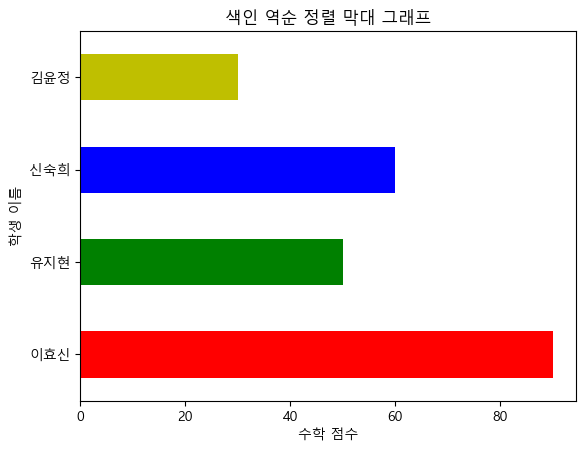

In [154]:
chartdata01.plot(kind='barh', rot = 0, 
      use_index=True, grid=False, table=False, color=['r', 'g', 'b', 'y'])
plt.xlabel('수학 점수')
plt.ylabel('학생 이름')
plt.title('색인 역순 정렬 막대 그래프')

<h4><font color="green">수평 막대 그래프(값 기반 오름차순 정렬)</font></h4>

In [156]:
chartdata02=exercise['sci'].sort_values(ascending=True)
chartdata02.to_frame()

,sci
name,
이효신,40
신숙희,60
김윤정,70
유지현,95


Text(0.5, 1.0, '값 기반 오름차순 정렬 막대 그래프')

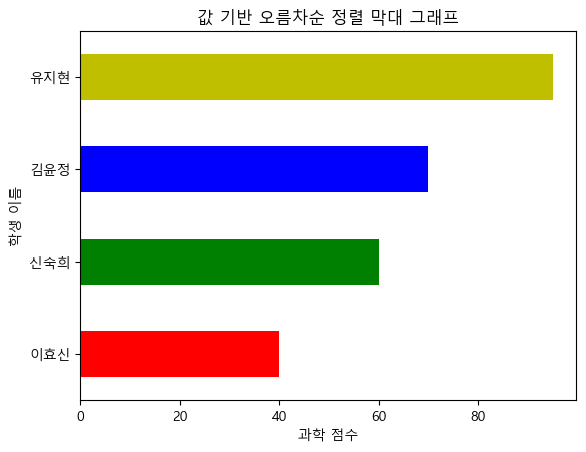

In [160]:
chartdata02.plot(kind='barh', rot = 0, 
      use_index=True, grid=False, table=False, color=['r', 'g', 'b', 'y'])
plt.xlabel('과학 점수')
plt.ylabel('학생 이름')
plt.title('값 기반 오름차순 정렬 막대 그래프')